<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/Hall/phywe/Hall_phywe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab4 Hall: Measurements as in [PHYWE manual](https://phywe-itemservice.s3.eu-central-1.amazonaws.com/sites/DMS-Phywe/PROD/de-DE/item/phy_itemtestinstruction/P2/P2530116/P2530116_en.pdf)

> The resistivity and Hall voltage of a rectangular germanium sample are measured as a
function of temperature and magnetic field. The band spacing, the specific conductivity,
the type of charge carrier and the mobility of the charge carriers are determined from
the measurements.


Evgeny Kolonsky 2025

v.0.1.3


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import requests

# Constants and parameters



In [16]:
# Boltzmann constant
k = 8.625e-5 # eV/K

# Geometry
d = 1e-3 # thikness, m
L = 16e-3 # length between ohmic contacts, m
W = 10e-3 # width, m

# Theory

For both n-Germanium and p-Germanium, there is a linear relationship between the Hall voltage $U_H$ and the control current $I_p$:
$$
U_H = \alpha I_p.
$$

The change in resistance of the sample due to the magnetic field is associated with a reduction in the mean
free path of the charge carriers. Since the current is constant during the measurement, the change of
resistance is calculated as
$$
\frac{R(B) - R_0}{R_0} = \frac{U(B) - U_0}{U_0}
$$
where $R(B), U(B)$ are resistance and voltage of the sample with the existence of a magentic field and $R_0, U_0$ nd voltage of the sample when the magnetic field $B = 0$.

In the region of intrinsic conductivity, we have
$$
\sigma = \sigma_0 \exp\left( \frac{E_g}{2 k T}\right)
$$
where $\sigma$ is conductivity, $E_g$ - energy of bandgap, $k$ - Boltzmann constant, $T$ - absolute temperature.

By taking the logarithm of both sides of the above equation, we get
$$
\log \sigma = \log\sigma_0 + \frac{E_g}{2k}T^{-1}.
$$
If the logarithm of the conductivity $\log\sigma$ is plotted against the reciprocal of the temperature $T^{-1}$, a linear
relationship is obtained with a slope from which energy gap $E_g$ can be determined.

With the directions of control current and magnetic field, the charge carriers giving rise to the current in the
sample are deflected towards the front edge of the sample. Therefore, if (in an n-doped probe) electrons are
the predominant charge carriers, the front edge will become negative, and, with hole conduction in a pdoped sample, positive.


The conductivity $\sigma_0$, the charge carrier mobility $\mu_H$, and the charge carrier concentration $p$ are related
through the Hall constant $R_H$:
$$ R_H = \frac{U_H}{B} \frac{d}{L},$$
$$ \mu_H = R_H \cdot \sigma_0 =  \frac{U_H L}{U_p W \cdot B},$$
$$ p = \frac{1}{e} R_H.$$

The conductivity at room temperature is calculated from the sample length $L$, the sample cross-section $A$
and the sample resistance $R$ as follows:
$$ \sigma_0 = \frac{L}{R A}.$$

## Task 0. Misalignment slope

1. Set the current and the magnetic field to zero and calibrate the Hall voltage to zero.
2. Take readings  for $-30\,\text{mA} < I_p < +30\,\text{mA}$
3. Calculate misalignment slope $\beta$
$$ U_H|_{B=0} =  \beta U_p + \text{offset} $$

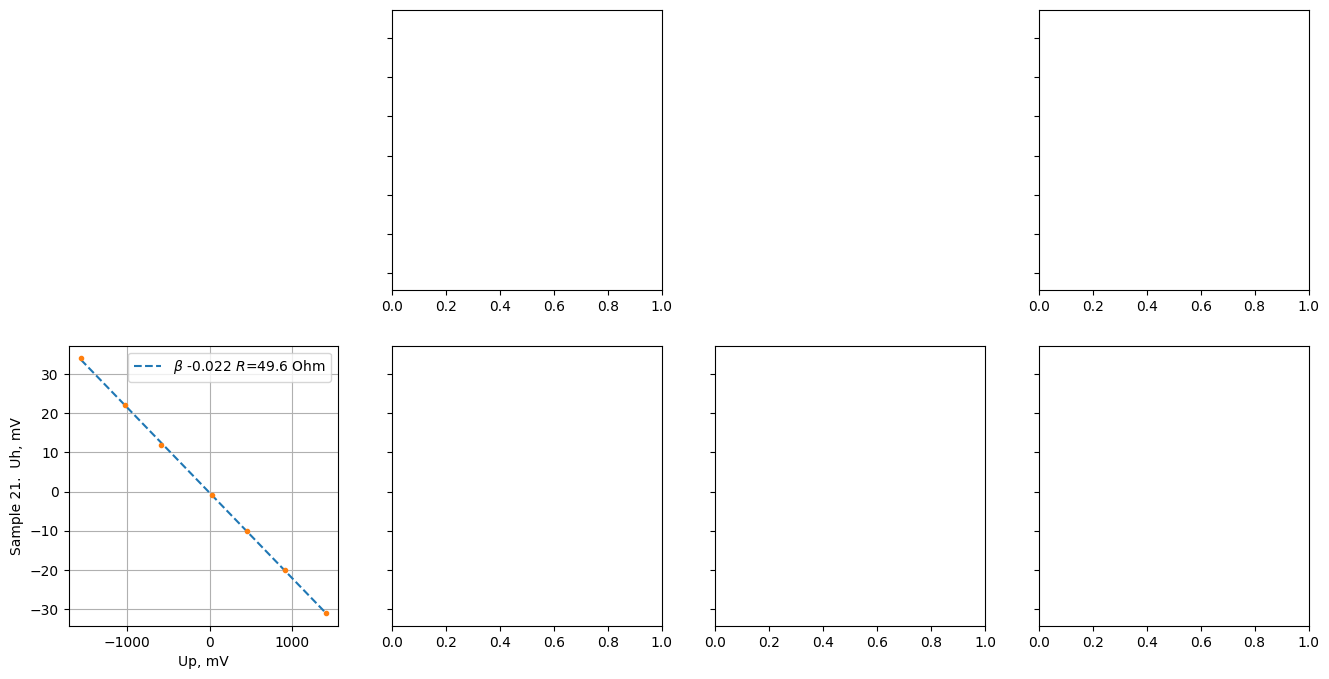

In [44]:
beta = {}
R = {}
names = ['21']
fig, ax = plt.subplots(2, 4, figsize=(16, 8), sharey=True)

for name in names:
  url = f'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/Hall/phywe/{name}_zero.txt'
  response = requests.get(url)
  Ip, T, Uh, Up = np.genfromtxt(response.text.splitlines()).T
  first_digit  = int(name[:2]) % 10
  second_digit = int(name[:2]) // 10
  axx = ax[second_digit-1, first_digit-1]

  axx.set_xlabel('Up, mV')
  axx.set_ylabel(f'Sample {name}.  Uh, mV')

  fit = linregress(Up, Uh)
  beta[name] = fit.slope
  R[name] = 1 / linregress(Up, Ip).slope
  axx.plot(Up, fit.intercept + fit.slope *Up, '--', label=rf'$\beta$ {beta[name]:.3f} $R$={R[name]:.1f} Ohm')
  axx.plot(Up, Uh, '.')
  axx.legend()
  axx.grid()
ax[0,0].remove()
ax[0,2].remove()




# Task 1

> Set the magnetic field to a value of 250 mT by changing the voltage and current on
the power supply. Determine the Hall voltage $U_H$ as a function of the current $I_p$ from -30 mA to 30mA in
steps of 5 mA. You will receive a typical measurements for n- and p-Germanium.



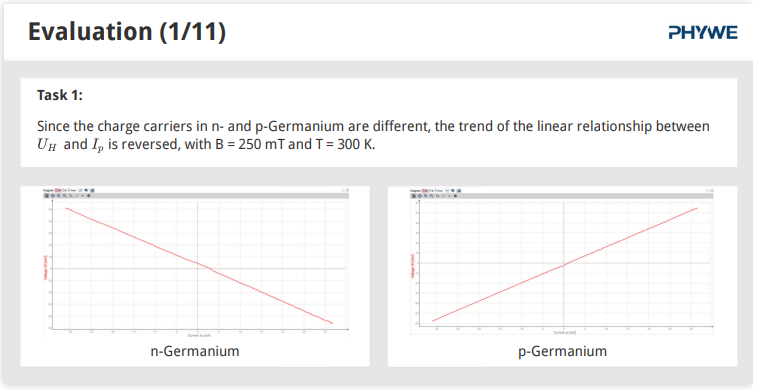

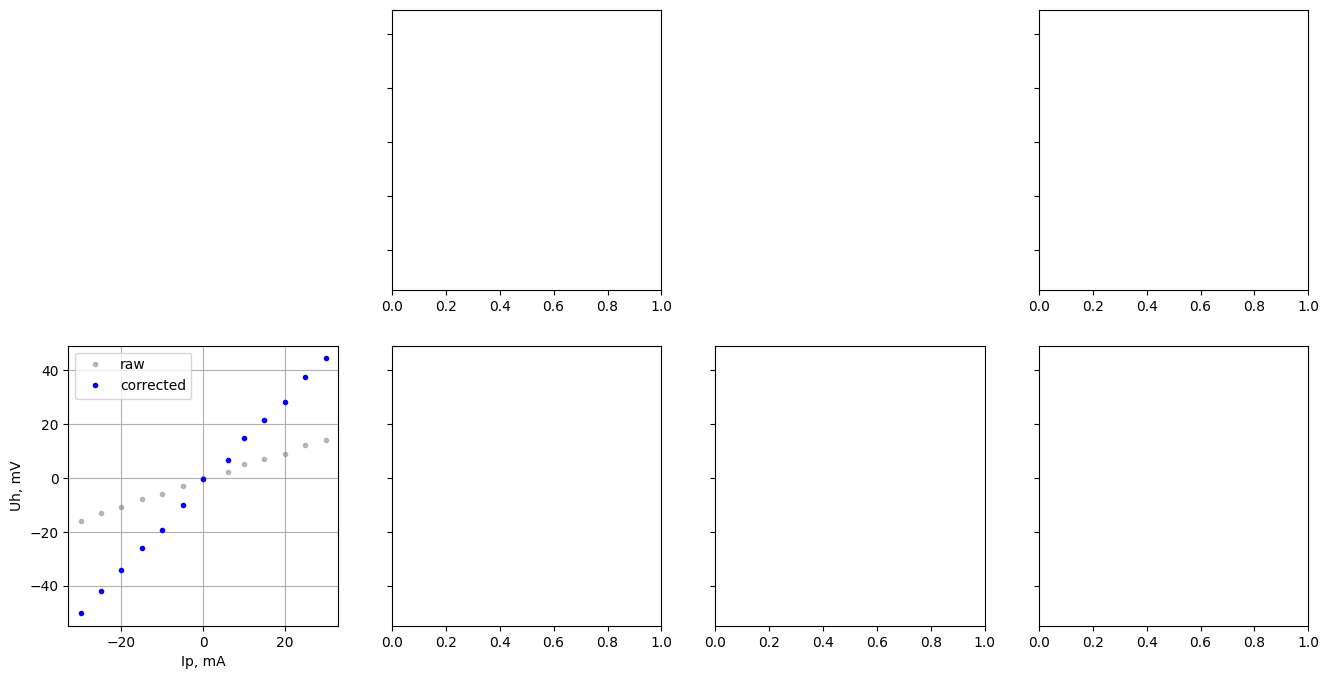

In [9]:
names = ['21']
fig, ax = plt.subplots(2, 4, figsize=(16, 8), sharey=True)

for name in names:
  url = f'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/Hall/phywe/{name}_task1.txt'
  response = requests.get(url)
  Ip, T, Uh, Up = np.genfromtxt(response.text.splitlines()).T
  Uh_ = Uh - beta[name] * Up
  first_digit  = int(name[:2]) % 10
  second_digit = int(name[:2]) // 10
  axx = ax[second_digit-1, first_digit-1]

  axx.set_xlabel('Ip, mA')
  axx.set_ylabel('Uh, mV')

  axx.plot(Ip, Uh, '.', color='gray', alpha=0.5, label='raw')
  axx.plot(Ip, Uh_, '.', color='blue', label='corrected')
  axx.legend()
  axx.grid()
ax[0,0].remove()
ax[0,2].remove()




# Task 2

>Set the control current $I_p$ to 30 mA. Determine the sample voltage $U_p$
as a function of the positive magnetic induction $B$ up to 300 mT. Calculate the change in resistance of the
specimens from the measurements
$$
\frac{R(B) - R_0}{R_0} = \frac{U(B) - U_0}{U_0}
$$
and plot the results on graphs.

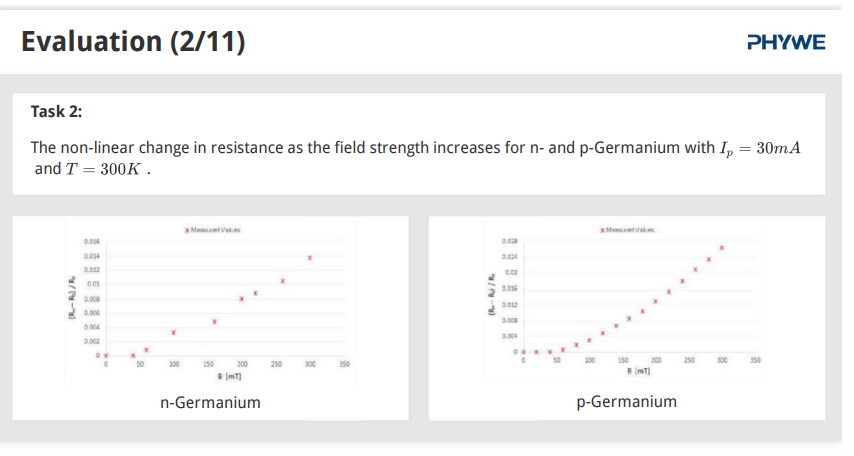

/tmp/ipython-input-3531688309.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axx.legend()


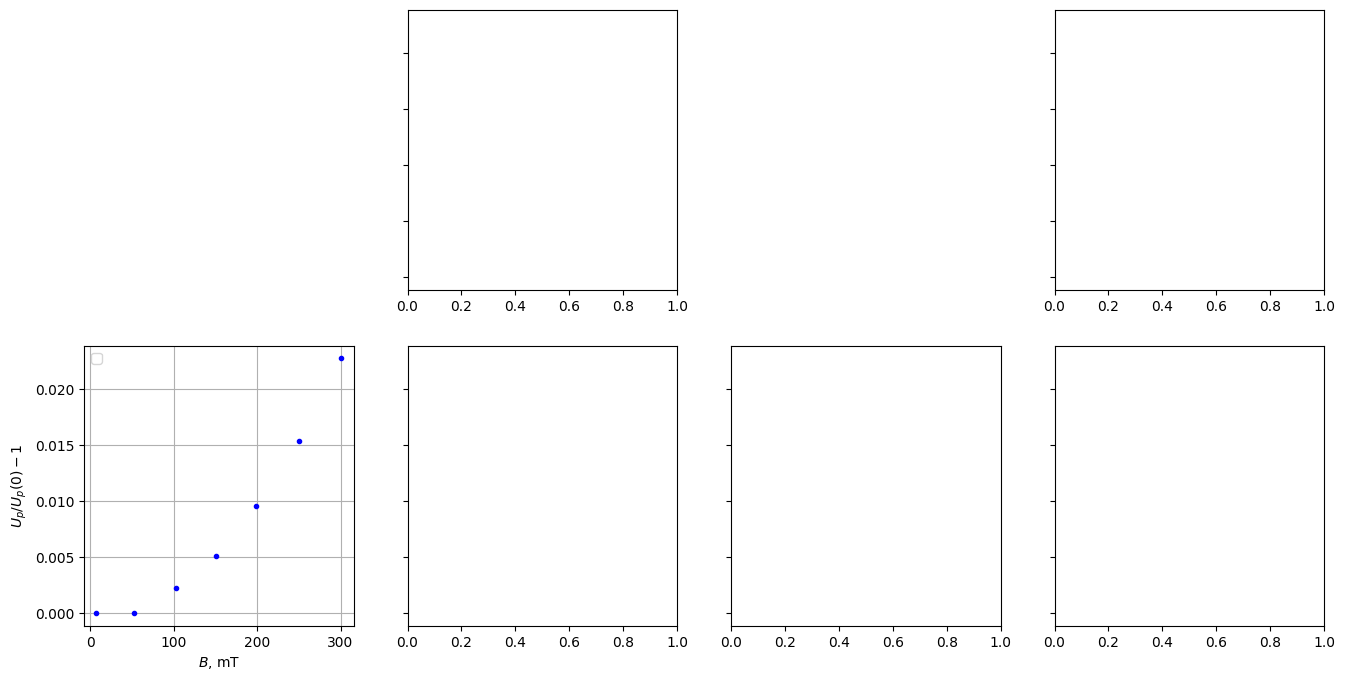

In [12]:
names = ['21']
fig, ax = plt.subplots(2, 4, figsize=(16, 8), sharey=True)

for name in names:
  url = f'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/Hall/phywe/{name}_task2.txt'
  response = requests.get(url)
  B, T, Uh, Up = np.genfromtxt(response.text.splitlines()).T
  Uh_ = Uh - beta[name] * Up
  first_digit  = int(name[:2]) % 10
  second_digit = int(name[:2]) // 10
  axx = ax[second_digit-1, first_digit-1]

  axx.set_xlabel(r'$B$, mT')
  axx.set_ylabel(r'$U_p / U_p(0) - 1$')

  axx.plot(B, Up / Up[0] - 1, '.', color='blue')
  axx.legend()
  axx.grid()
ax[0,0].remove()
ax[0,2].remove()



# Task 3

> At the beginning, set the current $I_p$ to a value of 30 mA. The magnetic field is
off. The current remains nearly constant during the measurement, but the voltage  $U_p$  changes according to a change in temperature $T$. Start the measurement by activating the heating coil with the ”on/off”-knob on
the backside of the module. The specimen will be heated to a maximum temperature of around 145−150 °C
and the module will stop the heating automatically. Determine the cooling curve of the change in voltage $U_p$
depending on the change in temperature $T$ for a temperature range from 140°C to room temperature.
Typical curves will be obtained.

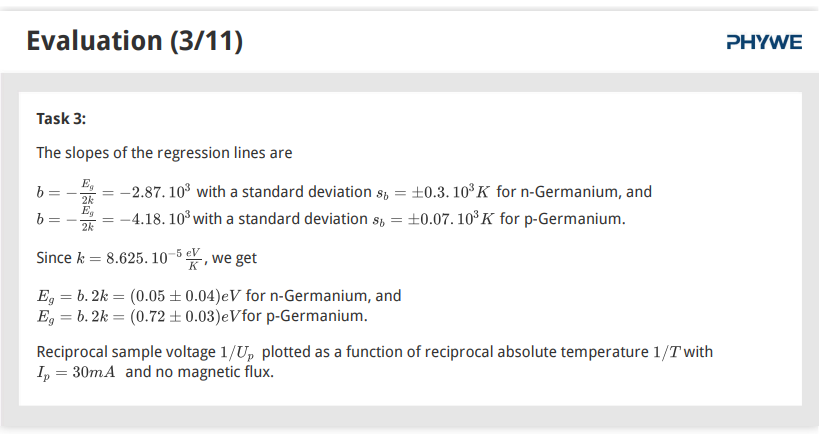

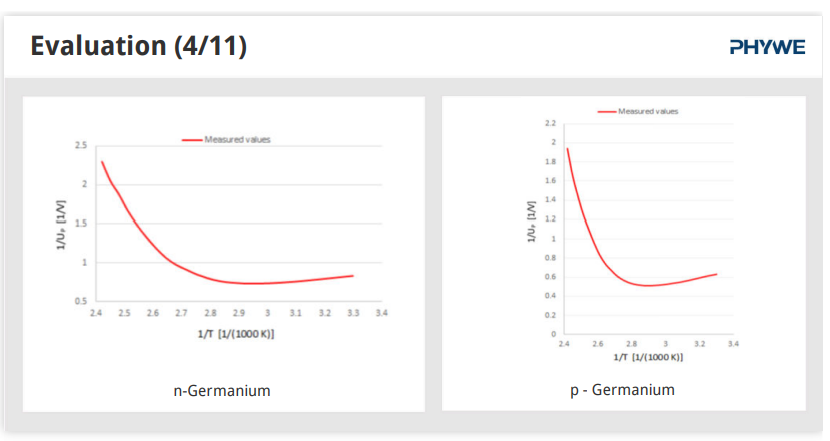

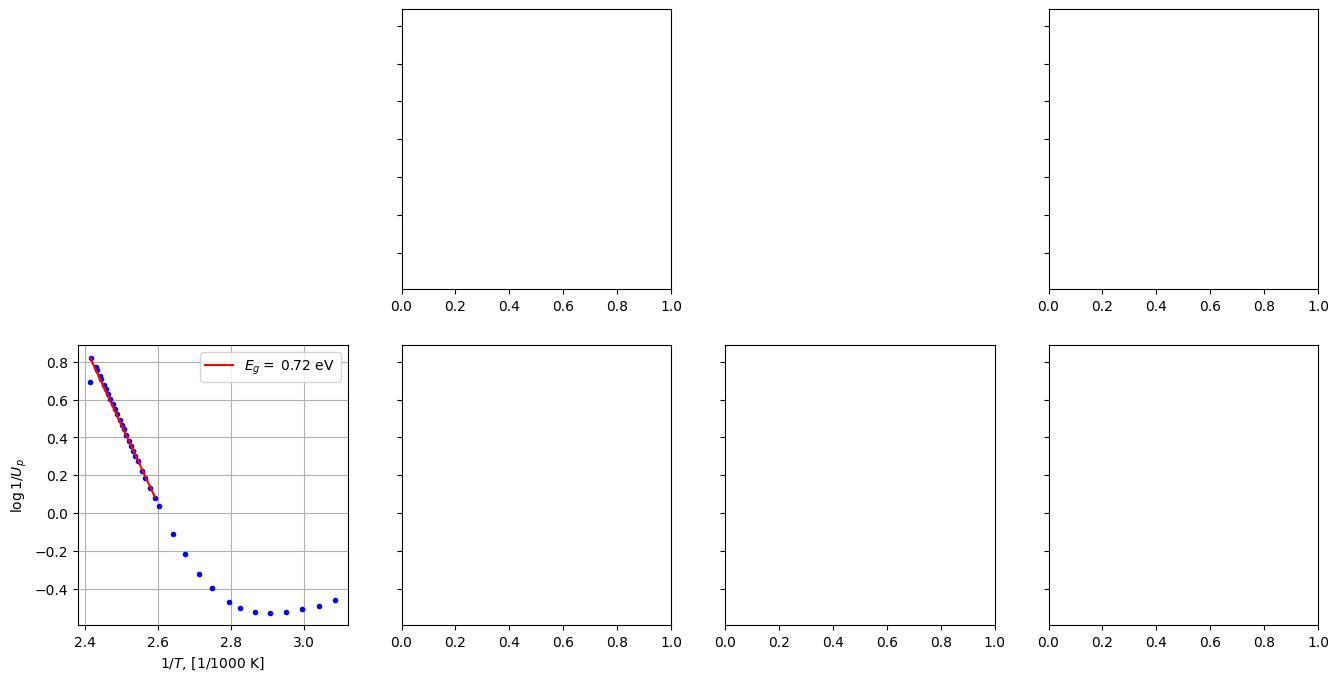

In [29]:
names = ['21']
fig, ax = plt.subplots(2, 4, figsize=(16, 8), sharey=True)

for name in names:
  url = f'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/Hall/phywe/{name}_task3.txt'
  response = requests.get(url)
  T, Uh, Up = np.genfromtxt(response.text.splitlines()).T
  T += 273.15 # C to K
  Up *= 1e-3 # mV to V
  Uh *= 1e-3 # mV to V
  # correction
  Uh_ = Uh - beta[name] * Up
  first_digit  = int(name[:2]) % 10
  second_digit = int(name[:2]) // 10
  axx = ax[second_digit-1, first_digit-1]

  x = 1 / T
  y = np.log(1/ Up)
  mask = (x * 1000 < 2.6)
  fit = linregress(x[mask], y[mask])
  y_predicted = fit.intercept + fit.slope * x[mask]
  b = fit.slope
  Eg = -b * 2 * k
  axx.set_xlabel(r'$1/T$, [1/1000 K]')
  axx.set_ylabel(r'$\log 1/U_p$')
  axx.plot(x *1000, y, '.', color='blue')
  axx.plot(x[mask] * 1000, y_predicted, color='red', label=fr'$E_g=$ {Eg:.2} eV')
  axx.legend()
  axx.grid()
ax[0,0].remove()
ax[0,2].remove()



# Task 4

Set the current to a value of 30 mA. Determine the Hall voltage $U_H$ as a
function of the magnetic induction $B$. Start with -300 mT by changing the polarity of the coil-current on the
power supply and increase the magnetic induction in steps of nearly 20 mT. At zero point, you have to
change the polarity again.


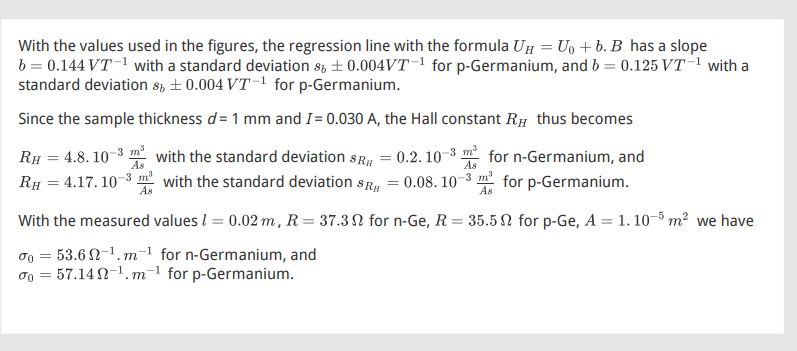

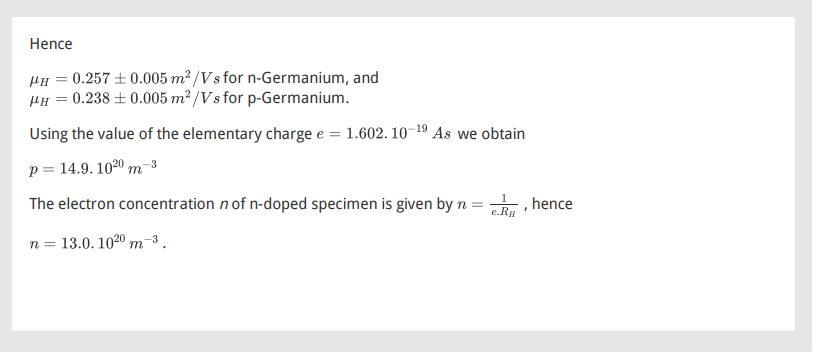

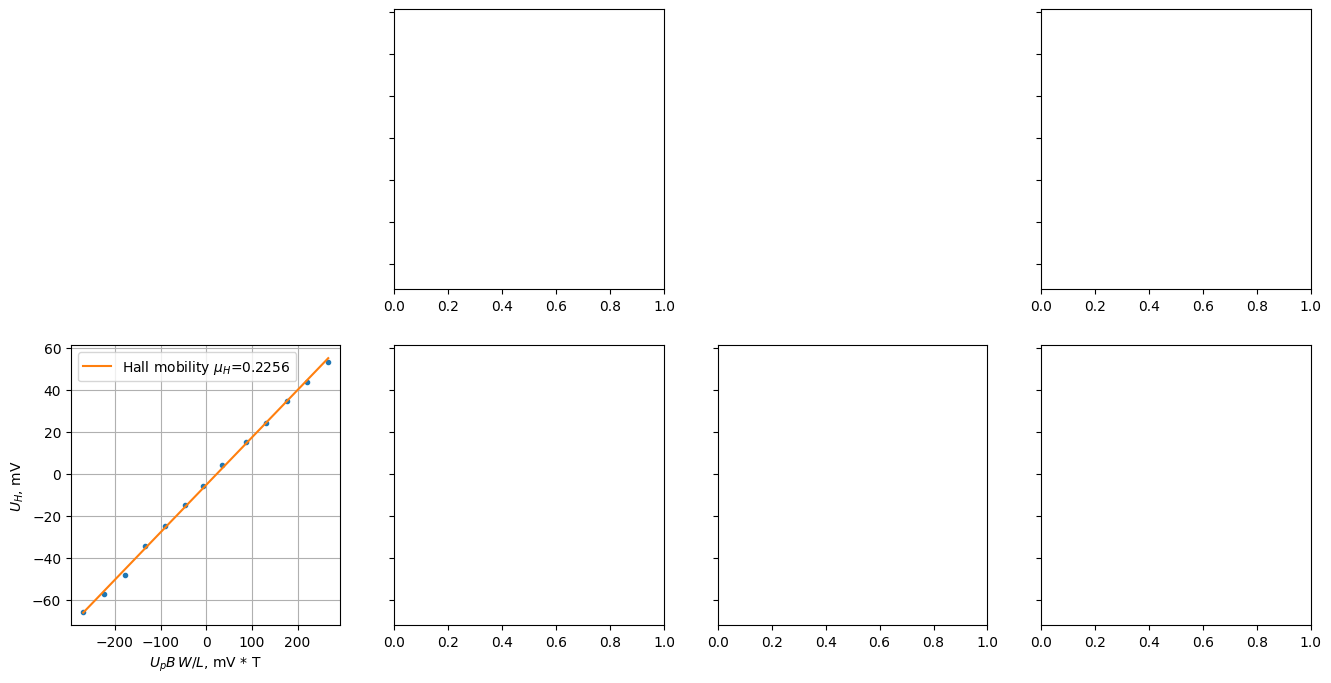

In [60]:
names = ['21']
fig, ax = plt.subplots(2, 4, figsize=(16, 8), sharey=True)

for name in names:
  Ip = 30e-3 # A
  url = f'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/Hall/phywe/{name}_task4.txt'
  response = requests.get(url)
  B, T, Uh, Up = np.genfromtxt(response.text.splitlines()).T
  B *= 1e-3
  Uh *= 1e-3
  Up *= 1e-3
  Uh_ = Uh - beta[name] * Up
  first_digit  = int(name[:2]) % 10
  second_digit = int(name[:2]) // 10
  axx = ax[second_digit-1, first_digit-1]

  y = Uh_
  x = Up * W/L * B
  fit = linregress(x, y)
  muh = fit. slope
  muh_error  = fit.stderr

  axx.plot(x*1e3, y*1e3, '.')
  axx.plot(x*1e3, 1e3*(fit.slope * x + fit.intercept), label=fr'Hall mobility $\mu_H$={muh:.4f}')
  axx.grid()
  axx.set_xlabel(r'$U_p B\,W/L$, mV * T')
  axx.set_ylabel(r'$U_H$, mV')
  axx.legend()
ax[0,0].remove()
ax[0,2].remove()



# Task 5

Hall voltage $U_H$ is plotted as a function of the temperature $T$ with $I_p=$ 300 mA and $B=$ 300 mT. Graphs shows the Hall voltage decreases with increasing temperatue for both n- and p-Germanium.

Since the experiment is performed with a constant current, it can be assumed that the increase of charge
carriers (transition from extrinsic to intrinsic conduction) with the associated reduction of the drift velocity $v$ is responsible for this. (The same current for a higher number of charge carriers means a lower drift
velocity).

The drift velocity is in turn related to the Hall voltage by the Lorentz force.

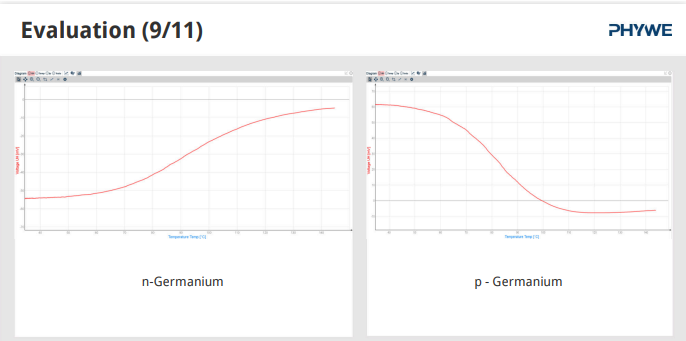

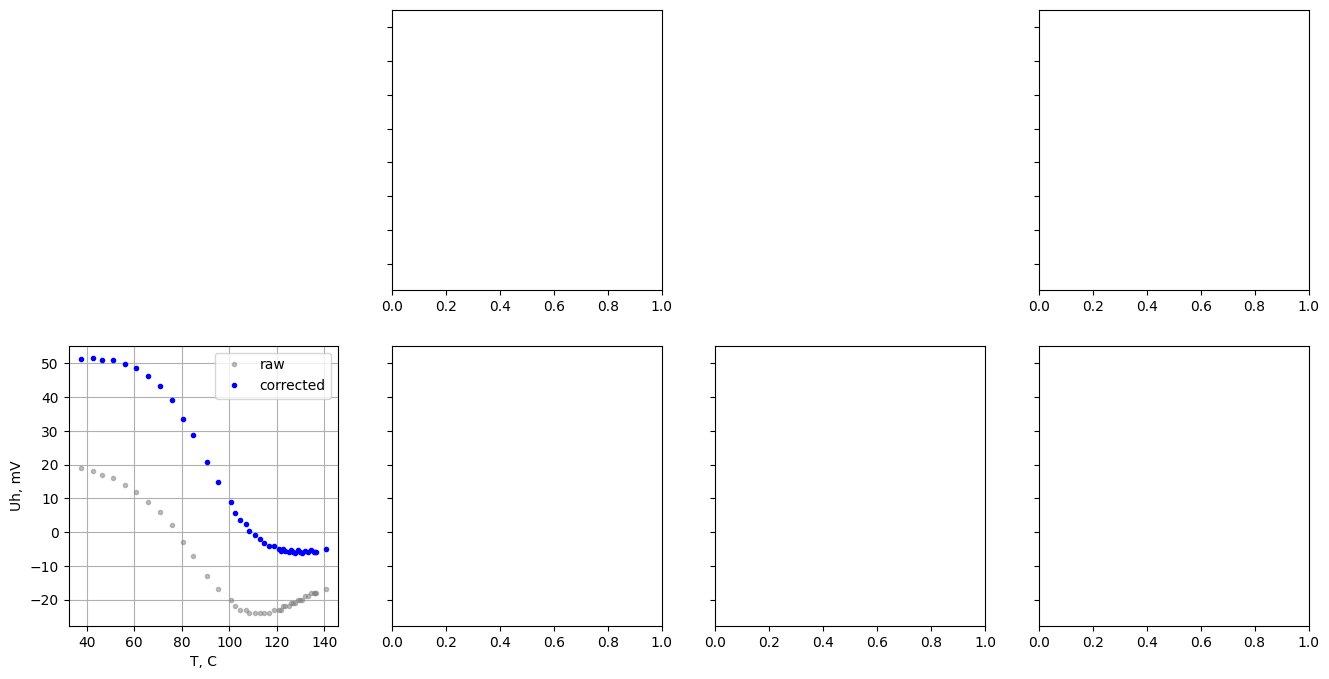

In [65]:
names = ['21']
fig, ax = plt.subplots(2, 4, figsize=(16, 8), sharey=True)

for name in names:
  url = f'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/Hall/phywe/{name}_task5.txt'
  response = requests.get(url)
  T, Uh, Up = np.genfromtxt(response.text.splitlines()).T
  Uh_ = Uh - beta[name] * Up
  first_digit  = int(name[:2]) % 10
  second_digit = int(name[:2]) // 10
  axx = ax[second_digit-1, first_digit-1]

  axx.set_xlabel('T, C')
  axx.set_ylabel('Uh, mV')

  axx.plot(T, Uh, '.', color='gray', alpha=0.5, label='raw')
  axx.plot(T, Uh_, '.', color='blue', label='corrected')
  axx.legend()
  axx.grid()
ax[0,0].remove()
ax[0,2].remove()
